### The problem statement


The problem is to model and investigate the linear relationship between Sales and Advertising dataset for a dietary weight control product.

In [11]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

In [25]:
df = pd.read_csv('SALES.txt',sep = '\s+',header= None)#sep='\s+': This tells Pandas to split columns using any whitespac
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\muham\AppData\Local\Temp\ipykernel_4700\423316460.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('SALES.txt',sep = '\s+',header= None)#sep='\s+': This tells Pandas to split columns using any whitespace


,0,1
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [26]:
# Rename columns of df dataframe

df.columns = ['Sales', 'Advertising']

In [28]:
df.head()

,Sales,Advertising
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes


In [30]:
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [36]:
# Declare feature variable and target variable

X = df[['Sales']]
y = df['Advertising']

# Sales and Advertising data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

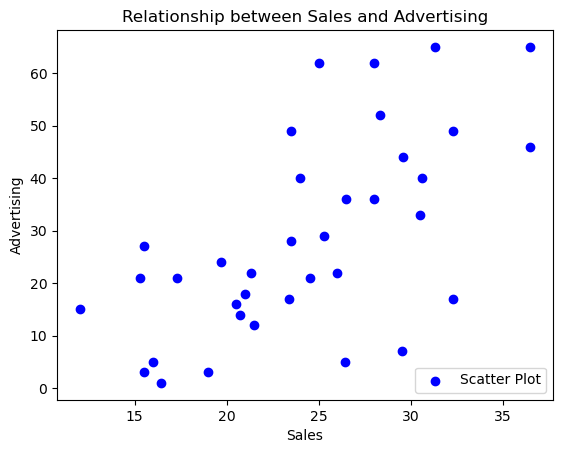

In [39]:
# Plot scatter plot between X and y

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

In [41]:
X.shape,y.shape

((36, 1), (36,))

In [42]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24,)
(12, 1)
(12,)


In [49]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)



LinearRegression()

In [51]:

# Predict on the test data
y_pred=lm.predict(X_test)
y_pred

array([15.16349678, 29.44882869, 31.37494085, 34.2641091 , 47.42587557,
       39.07938952, 23.34947349, 16.60808091, 26.55966044, 36.35073062,
       33.78258106, 26.39915109])

In [54]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_,
print(" model slope, a:" , a)
print(" model intercept, b:" , b) 

 model slope, a: [1.60509347]
 model intercept, b: (-11.160036159979665,)


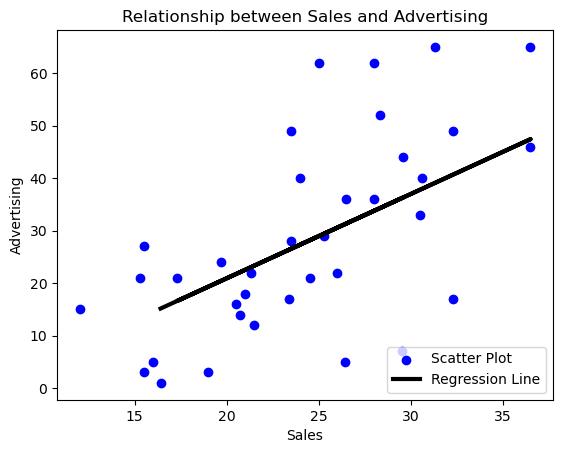

In [61]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

In [63]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

11.227260890598616

In [62]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5789222227665716

#### Insights: 
The RMSE value has been found to be 11.2273. It means the standard deviation for our prediction is 11.2273. So, sometimes we expect the predictions to be off by more than 11.2273 and other times we expect less than 11.2273. So, the model is not good fit to the data.
In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .5789. It means that this model explains 57.89 % of the variance in our dependent variable. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide good fit to the data.

In [64]:
lm.score(X_train,y_train)

0.2861319267488458

In [65]:
lm.score(X_test,y_test)

0.5789222227665716

#### Insights:
I calculate training set score as 0.2861. Similarly, I calculate test set score as 0.5789. The training set score is very poor. So, the model does not learn the relationships appropriately from the training data. Thus, the model performs poorly on the training data. It is a clear sign of Underfitting. Hence, I validated my finding that the linear regression model does not provide good fit to the data